# lab random forests

In [1]:
import pandas as pd
import numpy as np


In [2]:
numerical = pd.read_csv('numerical (1).csv')
categorical = pd.read_csv('categorical (1).csv')
targets = pd.read_csv('target (1).csv')
data = pd.concat([numerical, categorical, targets], axis = 1)
data['TARGET_B'].value_counts()

TARGET_B
0    90569
1     4843
Name: count, dtype: int64

In [3]:
data.shape

(95412, 339)

In [4]:
print(data.columns.tolist())

['TCODE', 'AGE', 'INCOME', 'WEALTH1', 'HIT', 'MALEMILI', 'MALEVET', 'VIETVETS', 'WWIIVETS', 'LOCALGOV', 'STATEGOV', 'FEDGOV', 'WEALTH2', 'POP901', 'POP902', 'POP903', 'POP90C1', 'POP90C2', 'POP90C3', 'POP90C4', 'POP90C5', 'ETH1', 'ETH2', 'ETH3', 'ETH4', 'ETH5', 'ETH6', 'ETH7', 'ETH8', 'ETH9', 'ETH10', 'ETH11', 'ETH12', 'ETH13', 'ETH14', 'ETH15', 'ETH16', 'AGE901', 'AGE902', 'AGE903', 'AGE904', 'AGE905', 'AGE906', 'AGE907', 'CHIL1', 'CHIL2', 'CHIL3', 'AGEC1', 'AGEC2', 'AGEC3', 'AGEC4', 'AGEC5', 'AGEC6', 'AGEC7', 'CHILC1', 'CHILC2', 'CHILC3', 'CHILC4', 'CHILC5', 'HHAGE1', 'HHAGE2', 'HHAGE3', 'HHN1', 'HHN2', 'HHN3', 'HHN4', 'HHN5', 'HHN6', 'MARR1', 'MARR2', 'MARR3', 'MARR4', 'HHP1', 'HHP2', 'DW1', 'DW2', 'DW3', 'DW4', 'DW5', 'DW6', 'DW7', 'DW8', 'DW9', 'HV1', 'HV2', 'HV3', 'HV4', 'HU1', 'HU2', 'HU3', 'HU4', 'HU5', 'HHD1', 'HHD2', 'HHD3', 'HHD4', 'HHD5', 'HHD6', 'HHD7', 'HHD8', 'HHD9', 'HHD10', 'HHD11', 'HHD12', 'ETHC1', 'ETHC2', 'ETHC3', 'ETHC4', 'ETHC5', 'ETHC6', 'HVP1', 'HVP2', 'HVP3', 

In [5]:
nan=data.isna().sum()
nan[nan!=0]

Series([], dtype: int64)

In [6]:
data

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,91,11,92,7,95,12,90,1,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,87,11,94,11,95,12,87,2,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,93,10,96,1,96,1,79,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,96,2,96,2,96,2,96,2,0,0.0
95408,1,48.000000,7,9,1,0,31,43,19,4,...,96,3,96,3,96,3,96,3,0,0.0
95409,1,60.000000,5,9,0,0,18,46,20,7,...,96,3,95,1,96,10,94,10,0,0.0
95410,0,58.000000,7,9,0,0,28,35,20,9,...,90,11,96,8,97,1,86,12,1,18.0


In [7]:
#class imbalance:
count_classes = data['TARGET_B'].value_counts()
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.90


In [8]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder

y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


X_cat  = X.select_dtypes(object)
levels = [ list(X[col].unique()) for col in X_cat.columns ]


X_train_num = X_train.select_dtypes(np.number)
X_test_num  = X_test.select_dtypes(np.number)

X_train_cat = X_train.select_dtypes(object)
X_test_cat  = X_test.select_dtypes(object)

encoder = OneHotEncoder(drop='first', categories=levels).fit(X_train_cat)

X_train_cat_encoded_np = encoder.transform(X_train_cat).toarray()
X_test_cat_encoded_np  = encoder.transform(X_test_cat).toarray()

X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded_np, columns=encoder.get_feature_names_out(), index=X_train.index)
X_test_cat_encoded_df  = pd.DataFrame(X_test_cat_encoded_np,  columns=encoder.get_feature_names_out(), index=X_test.index)

X_train = pd.concat([X_train_num, X_train_cat_encoded_df], axis = 1)
X_test  = pd.concat([X_test_num, X_test_cat_encoded_df], axis = 1)

In [9]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler 
print(X_train.shape)
print(y_train[y_train== 0].shape)

(76329, 355)
(72486,)


In [10]:
ros = RandomOverSampler(random_state=42)

X_train_oversampled, y_train_oversampled = ros.fit_resample(X_train, y_train)
display(pd.concat([X_train_oversampled,y_train_oversampled],axis=1).head())
print('Resampled dataset shape %s' % Counter(y_train_oversampled))
print(y_train_oversampled.value_counts())

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_F,RFA_2A_D,GEOCODE2_A,GEOCODE2_D,GEOCODE2_B,DOMAIN_A_S,DOMAIN_A_R,DOMAIN_A_U,DOMAIN_A_C,TARGET_B
0,1,75.0,4,6,2,0,31,10,68,6,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,0,53.0,5,9,0,0,29,24,38,7,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,1,60.0,5,1,5,0,42,16,62,10,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,1,77.0,6,6,9,1,40,23,41,8,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,3,55.0,5,2,21,33,27,29,18,12,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


Resampled dataset shape Counter({0: 72486, 1: 72486})
TARGET_B
0    72486
1    72486
Name: count, dtype: int64


In [11]:
X_train_oversampled.shape, y_train_oversampled.shape

((144972, 355), (144972,))

The Accuracy for the Random Forest in the TRAIN set is 1.00
The Accuracy for the Random Forest in the TEST  set is 0.99


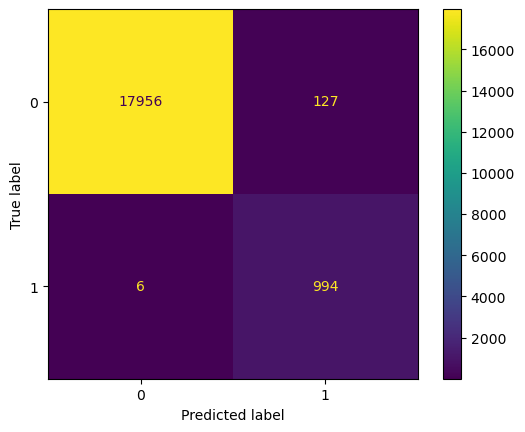

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)

clf.fit(X_train_oversampled, y_train_oversampled)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train_oversampled, y_train_oversampled)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_test_pred = clf.predict(X_test)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(cm_test, display_labels=clf.classes_);
disp.plot()

In [13]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred)))

The accuracy in the TEST set is: 0.99
The precision in the TEST set is: 0.89
The recall in the TEST set is: 0.99
The F1 in the TEST set is: 0.94
The Kappa in the TEST set is: 0.93


In [ ]:
# Discuss the model predictions and it's impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How much the money the company will not earn because of missclassifications made by the model? (TARGET D column lists the amount of donation)

According to the above, the model is close to perfection across all metrics. Even the Kappa is amazing. Is that because of overfitting due to the massive oversampling I had to do to fix 90% class imbalance?

In [14]:
donors=targets[targets["TARGET_D"]!=0]
total_donations=donors["TARGET_D"].sum() # this is the total money donated
total_donations

75668.7

In [15]:
false_neg_indices=(y_test==1)&(y_test_pred==0)
false_neg_indices=false_neg_indices[false_neg_indices==True]
false_neg_indices

54256    True
17623    True
66327    True
78543    True
62055    True
16277    True
Name: TARGET_B, dtype: bool

In [16]:
false_neg_df=pd.DataFrame(data.loc[false_neg_indices.index,"TARGET_D"])
false_neg_df

,TARGET_D
54256,20.0
17623,20.0
66327,20.0
78543,15.0
62055,21.0
16277,15.0


In [17]:
data.iloc[54256]

TCODE                   0
AGE             61.611649
INCOME                  5
WEALTH1                 9
HIT                     0
                  ...    
LASTDATE_MM             9
FIRSTDATE_YR           95
FIRSTDATE_MM            2
TARGET_B                1
TARGET_D             20.0
Name: 54256, Length: 339, dtype: object

In [19]:
potential_donation_loss=((false_neg_df["TARGET_D"].sum())/total_donations)*100
print("The potential loss due to false negative predictions is: ${:.2f}".format(false_neg_df["TARGET_D"].sum()))
print("The potential loss due to false negative predictions is: {:.2f}% of the total donations received: {:.2f}".format(potential_donation_loss, total_donations))

The potential loss due to false negative predictions is: $111.00
The potential loss due to false negative predictions is: 0.15% of the total donations received: 75668.70


- Sklearn classification models are trained to maximize the accuracy. However, another error metric will be more relevant here. Which one? Please checkout make_scorer alongside with GridSearchCV in order to train the model to maximize the error metric of interest in this case.

Here I would take F1 instead of accuracy, because it is a balanced error metric against false positives and false negatives, and it is particularly suitable for class imbalance situations, since it gives equal weigth to false positives and negatives - meaning the possibility of misjudging on the minority class is reduced as compared to accuracy.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

#creating an instance for the model:
clf2 = RandomForestClassifier(random_state=42)

#the computational time was extremely high on a broader param_grid, so I decided to narrow down 
#the grid ranges to be closer to the parameters defined previously, since they performed very well already:
best_params = {'max_depth': 5,
    'min_samples_split': 20,
    'min_samples_leaf': 20,
    'max_samples': 0.8}

param_grid_narrow = {'max_depth': [best_params['max_depth'], best_params['max_depth'] + 1, best_params['max_depth'] - 1],
    'min_samples_split': [best_params['min_samples_split'], best_params['min_samples_split'] + 5, best_params['min_samples_split'] - 5],
    'min_samples_leaf': [best_params['min_samples_leaf'], best_params['min_samples_leaf'] + 5, best_params['min_samples_leaf'] - 5],
    'max_samples': [best_params['max_samples'], best_params['max_samples'] + 0.1, best_params['max_samples'] - 0.1]}



#applying the scorer on F1:
scorer = make_scorer(f1_score)

grid_search = GridSearchCV(clf2, param_grid_narrow, scoring=scorer, cv=5)

#fitting the model on the train_oversampled data:
grid_search.fit(X_train_oversampled, y_train_oversampled)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

#getting the best model from the grid search:
best_model = grid_search.best_estimator_

#evaluating the best model on the test set:
y_test_pred_best = best_model.predict(X_test)

print("The best parameter's accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_test_pred_best)))
print("The best parameter's precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_test_pred_best)))
print("The best parameter's recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_test_pred_best)))
print("The best parameter's F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_test_pred_best)))
print("The best parameter's Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_test_pred_best)))

Given the previous results:

The accuracy in the TEST set is: 0.99
The precision in the TEST set is: 0.89
The recall in the TEST set is: 0.99
The F1 in the TEST set is: 0.94
The Kappa in the TEST set is: 0.93